# Análise de Resíduos

No processo de análise de resultados de algoritmos de aprendizado de máquina, uma grande fonte de informações é contida nos resíduos do modelo. Resíduos são as diferenças entre os resultados esperados e os resultados inferidos do modelo. Uma análise minuciosa aqui pode revelar processos de *overfiting* ou *underfiting* e quantificar a parcela da estrutura presente nos dados que foi capturada pelo modelo.
    
Para realizar a análise dos resíduos, fazemos uso de ferramentas estatísticas bem conhecidas.


## Regressão Linear
A regressão linear é uma das técnicas de modelagem mais fundamentais. A utilizamo para estimar uma relação linear entre um conjunto de variáveis independentes $ X_i $ e uma variável de resultado dependente $ y $. Nosso modelo assume a forma de:
$$ y_i = \beta_{0} 1 + \beta_{i, 1} x_{i, 1} + \dots + \beta_{i, p} x_{i, p} + \epsilon_i = x_i'\beta + \epsilon_i $$

Para $i \in \{1, \dots, n \}$, onde $ n $ é o número de observações. Escrevemos em forma vetorial como:

$$ y = X\beta + \epsilon $$

Onde $ y $ é um vector $ n \times 1 $, $ X $ é uma matriz $ n \times p $, $ \beta $ é o vetor de coeficientes $ p \times 1 $ e $ \epsilon $ é um termo de erro amostrado de uma distribuição normal. Normalmente chamamos um modelo com $ p = 1 $ de regressão linear simples e um modelo com $ p> 1 $ de regressão linear múltipla.

Sempre que construímos um modelo, haverá lacunas entre o que um modelo prediz e o que é observado na amostra. As diferenças entre esses valores são conhecidas como os resíduos do modelo e podem ser usadas para verificar algumas das premissas básicas que se inserem no modelo. Os principais pressupostos a serem verificados são:

* ** Ajuste linear: ** A relação subjacente deve ser linear
* ** Homoscedasticidade: ** Os dados não devem ter tendência na variância
* ** Independente e Distribuído de forma idêntica: ** Os resíduos da regressão devem ser independentes e distribuídos de forma idêntica (i.i.d.) e não mostrar sinais de auto-correlação

Podemos usar os resíduos para ajudar a diagnosticar se o relacionamento que estimamos é real ou espúrio.

O erro estatístico é uma métrica similar associada à análise de regressão com uma diferença importante: enquanto os resíduos quantificam a diferença entre as previsões do modelo de regressão e a amostra observada, o erro estatístico é a diferença entre um modelo de regressão e o valor esperado não observável. Usamos resíduos em uma tentativa de estimar esse erro.

In [1]:
# Import libraries
import numpy as np
np.random.seed(1)
from statsmodels import regression
import statsmodels.api as sm
import statsmodels.stats.diagnostic as smd
import scipy.stats as stats
import math

import matplotlib.pyplot as plt
%matplotlib inline

# Regressão Linear Simples

Para servir como modelo exemplo para nossa análise, vamos definir uma regressão linear simples.

In [2]:
def linreg(X,Y):
    # Running the linear regression
    X = sm.add_constant(X)
    model = sm.OLS(Y, X).fit()
    B0 = model.params[0]
    B1 = model.params[1]
    X = X[:, 1]

    # Return summary of the regression and plot results
    X2 = np.linspace(X.min(), X.max(), 100)
    Y_hat = X2 * B1 + B0

    plt.scatter(X, Y, alpha=1) # Plot the raw data
    plt.plot(X2, Y_hat, 'r', alpha=1);  # Add the regression line, colored in red
    plt.xlabel('X Value')
    plt.ylabel('Y Value')
    plt.grid()
    return model, B0, B1

Vamos definir como exemplo uma relação entre $X$ e $Y$ que pode ser modelado com uma regressão linear. Definimos a relação e construimos um modelo em cima desta, plotando a linha de melhor ajuste dados os parametros da regressão. 

Linha de melhor ajuste: Y = 10.020277447612642 + 0.501451775047745*X


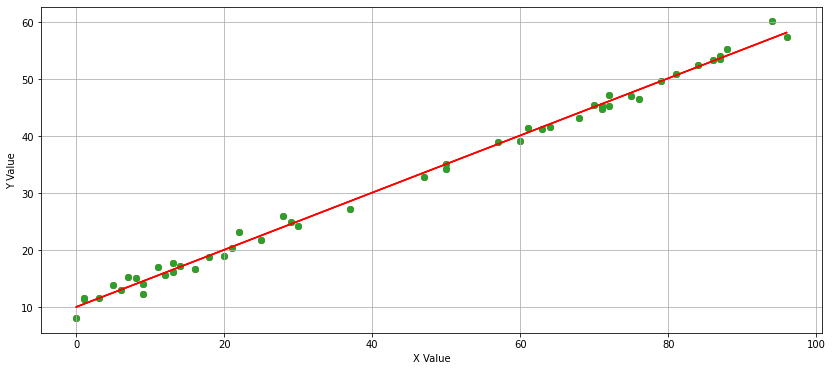

In [3]:
n = 50
X = np.random.randint(0, 100, n)
epsilon = np.random.normal(0, 1, n)

Y = 10 + 0.5 * X + epsilon

plt.figure(figsize=(14,6))
linreg(X,Y)[0];
print("Linha de melhor ajuste: Y = {0} + {1}*X".format(linreg(X, Y)[1], linreg(X, Y)[2]))

Este exemplo inclui algum ruído nos dados, assim como qualquer conjunto dados reais. Isso é inerente à amostragem de qualquer tipo de processo de geração de dados. Como resultado, nossa linha de melhor ajuste nunca cruzará exatamente os dados. Ter um modelo que se encaixa em cada observação que você tenha é um sinal claro de *overfitting*.

Para todos os modelos ajustado, haverá uma diferença entre o que o modelo de regressão prevê e o que foi observado, e é ai que se encaixam os resíduos.

## Residuais

A definição de um residual é a diferença entre o que é observado na amostra e o que é previsto pela regressão. Para qualquer residual $ r_i $, expressamos como:

$$ r_i = Y_i - \hat {Y_i} $$

Onde $ Y_i $ é o valor observado de $ Y $ e $ \hat {Y} _i $ é o valor previsto. Traçamos essas diferenças no seguinte gráfico:

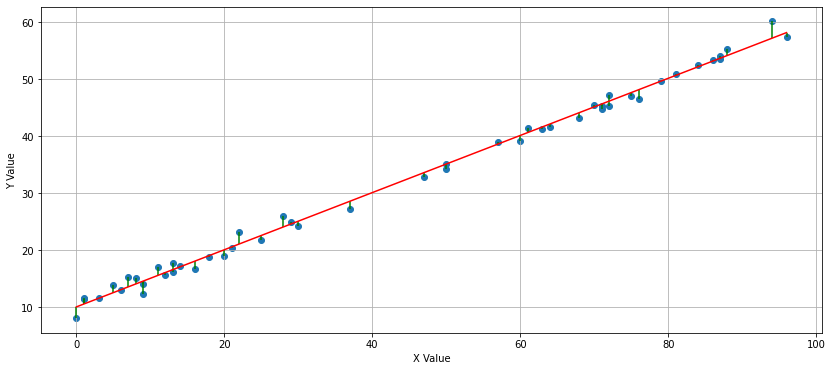

In [4]:
plt.figure(figsize=(14,6))
model, B0, B1 = linreg(X,Y)
residuals = model.resid
plt.errorbar(X,Y,xerr=0,yerr=[residuals,0*residuals],linestyle="None",color='Green');

Podemos extrair os resíduos diretamente do modelo ajustado.

In [5]:
residuals = model.resid
print(residuals)

[-1.37885437 -0.41827378 -0.86843226 -0.4704652  -0.55561067  1.35387098
 -0.03659716 -0.48264853 -1.3167258   0.99325758 -1.61167206 -0.41045337
 -0.08581238 -0.84467693 -0.02515641 -1.08821887 -0.31008685  0.39602402
  1.49201327  1.8957497   0.41582143  0.07874291 -0.95033141 -0.88094595
  0.49272302 -0.09905582  2.95808935 -0.69210945  0.20045357 -0.46466457
 -2.2721148   1.72495709 -0.37593264  0.73745874  2.034516    0.42344969
  0.96207978 -1.94247746 -1.00220918  0.1921916   1.01669935  1.2018657
  1.20652458 -0.77970235  1.15626813 -0.79089501 -0.92252217 -0.02817839
  0.39069293 -0.21862559]


# Diagnosticando Residuais

Muitos dos pressupostos que são necessários para ter um modelo de regressão linear válido podem ser verificados identificando padrões nos resíduos desse modelo. Podemos fazer uma checagem visual, observando o plot dos residuais de um determinado modelo.

Com um gráfico residual, observamos os valores previstos do modelo em relação aos próprios resíduos. O que queremos ver é apenas uma nuvem de pontos não relacionados, como por exemplo:

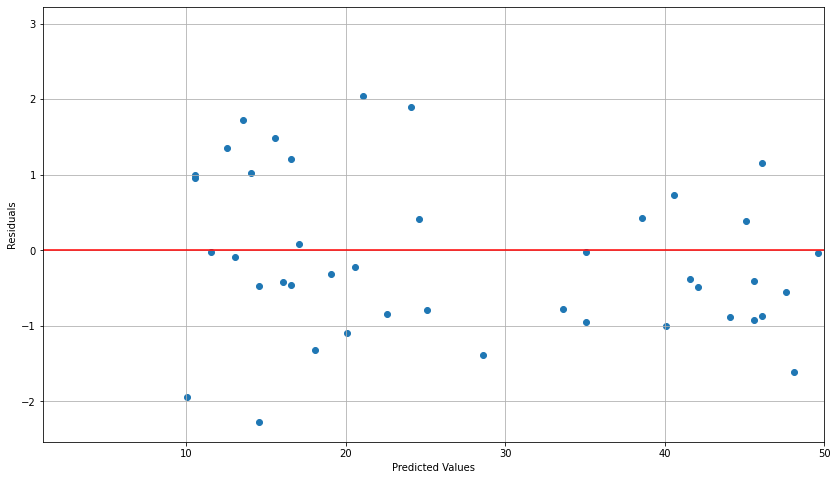

In [6]:
plt.figure(figsize=(14,8))
plt.scatter(model.predict(), residuals);
plt.axhline(0, color='red')
plt.xlabel('Predicted Values');
plt.ylabel('Residuals');
plt.xlim([1,50]);
plt.grid()

O que queremos é uma distribuição aleatória de resíduos. Os pontos não devem formar um padrão discernível. Isso indicaria que um modelo linear simples provavelmente seria um bom ajuste. Se vermos qualquer tipo de tendência, isso pode indicar a presença de autocorrelação ou heterocedasticidade no modelo.

## Adequação de um Modelo Linear

Ao procurar padrões em residuais, podemos determinar se o modelo linear é apropriado ou não. Uma regressão linear simples não seria apropriada para uma relação subjacente da forma:

$$ Y = \beta_0 + \beta_1 X ^ 2 $$

Como uma função linear não seria capaz de explicar completamente a relação entre $ X $ e $ Y $.

Se o relacionamento não é um bom ajuste para um modelo linear, o gráfico residual mostrará um padrão distinto. Em geral, um gráfico residual de uma regressão linear em uma relação não-linear mostrará viés e será assimétrico em relação ao exiso residual = 0 enquanto um gráfico residual de uma regressão linear em uma relação linear será geralmente simétrico sobre o eixo residual = 0.

Como exemplo, consideremos uma nova relação entre as variáveis $ X $ e $ Y $ que incorpora um termo quadrático.

beta_0:  16.749978265782776
beta_1:  -2.260128045974792


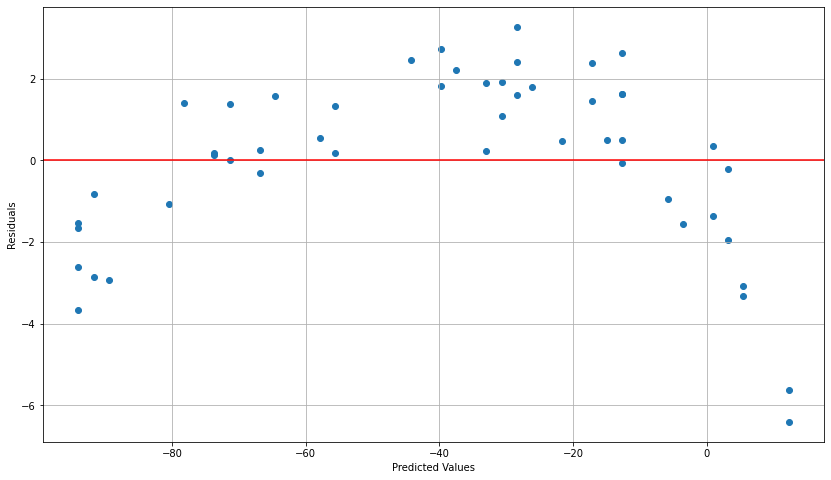

In [7]:
n = 50
X = np.random.randint(0, 50, n)
epsilon = np.random.normal(0, 1, n)
Y_nonlinear = 10 - X**1.2 + epsilon

model = sm.OLS(Y_nonlinear, sm.add_constant(X)).fit()
B0, B1 = model.params
residuals = model.resid

print('beta_0: ', B0)
print('beta_1: ', B1)
plt.figure(figsize=(14,8))
plt.scatter(model.predict(), residuals);
plt.axhline(0, color='red')
plt.xlabel('Predicted Values');
plt.ylabel('Residuals');
plt.grid()

O formato de "U invertido" exibido pelos resíduos é um sinal de que um modelo não-linear pode ser um ajuste melhor do que o modelo linear.

## Heteroscedasticidade

Um dos principais pressupostos por trás de uma regressão linear é que os dados subjacentes têm uma variância constante. Se houver parte dos dados com variância diferente do restante, os dados não são apropriados para uma regressão linear. ** Heteroscedasticidade ** é um termo que se refere a dados com variância não-constante, em oposição à homocedasticidade, quando os dados apresentam variação constante.

A heteroscedasticidade significativa invalida os resultados da regressão linear ao adicionas viés ao erro padrão do modelo. Como resultado, não podemos confiar nos resultados de testes de significância e intervalos de confiança gerados a partir do modelo e seus parâmetros.

Para evitar essas conseqüências, é importante usar os residuais para verificar a heteroscedasticidade e ajustar o modelo, se necessário.

Como um exemplo de detecção e correção da heterocedasticidade, consideremos ainda outra relação entre $ X $ e $ Y $:

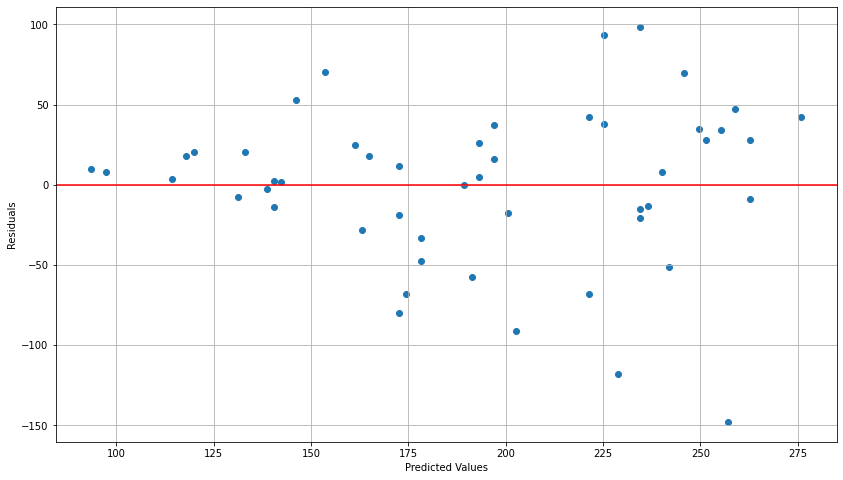

In [8]:
n = 50
X = np.random.randint(0, 100, n)
epsilon = np.random.normal(0, 1, n)
Y_heteroscedastic = 100 + 2*X + epsilon*X

model = sm.OLS(Y_heteroscedastic, sm.add_constant(X)).fit()
B0, B1 = model.params
residuals = model.resid

plt.figure(figsize=(14,8))
plt.scatter(model.predict(), residuals);
plt.axhline(0, color='red')
plt.xlabel('Predicted Values');
plt.ylabel('Residuals');
plt.grid()

Heteroscedasticidade muitas vezes se manifesta como esta propagação, dando-nos uma nuvem cónica em uma direção ou outra. À medida que avançamos no valor de $ x $, as magnitudes dos resíduos aumentam claramente. Uma regressão linear é incapaz de explicar essa variabilidade variável e os erros padrão de regressão serão tendenciosos.

### Métodos estatísticos para detecção de heterocedasticidade

Geralmente, queremos dar suporte a observações qualitativas sobre um gráfico residual com um método quantitativo. O plot residual nos levou a acreditar que os dados podem ser heterocedasticos. Vamos confirmar esse resultado com um teste estatístico.

Uma maneira comum de testar a presença de heteroscedasticidade é o teste de hipótese Breusch-Pagan. É bom combinar a análise qualitativa de um gráfico residual com a análise quantitativa de pelo menos uma prova de hipótese. Nós também podemos adicionar o teste White, mas, por enquanto, usaremos apenas Breusch-Pagan para testar a correlação acima. Existe uma função no pacote `statsmodels` chamado `het_breushpagan` que simplifica a computação:

In [9]:
breusch_pagan_p = smd.het_breuschpagan(model.resid, model.model.exog)[1]
print(breusch_pagan_p)
if breusch_pagan_p > 0.05:
    print("A relação não é heterocedastica.")
if breusch_pagan_p < 0.05:
    print("A relaçao é heterocedastica.")

0.024247018639289443
A relaçao é heterocedastica.


Nós estabelecemos nosso nível de confiança em $ \alpha = 0,05 $, então um valor p de Breguet-Pagan abaixo de $ 0,05 $ nos diz que a relação é heterocedastica. O uso de uma prova de hipótese traz risco de falso positivo ou falso negativo, razão pela qual pode ser bom confirmar este resultado com testes adicionais.

### Ajustando para Heteroscedasticidade

Se, após criar um gráfico residual e realizar os testes, você acredita que os dados apresentam heteroscedasticidade, há uma série de métodos que podem ser usados para tentar melhorar o ajuste. Os três nos quais nos concentraremos são as análises de diferenças, as transformações de logs e as transformações de Box-Cox.

#### Análise de diferenças

Uma análise de diferenças envolve a análise das diferenças de primeira ordem entre os valores adjacentes. Com isso, analisamos as mudanças de período para período de uma variável independente ao invés de olhar diretamente para seus valores. Muitas vezes, ao analisar as diferenças em vez dos valores brutos, podemos remover a heteroscedasticidade e assim utilizar o modelo apropriado.

In [10]:
# Finding first-order differences in Y_heteroscedastic
Y_heteroscedastic_diff = np.diff(Y_heteroscedastic)

Agora que nós armazenamos as diferenças de primeira ordem de `Y_heteroscedastic` em `Y_heteroscedastic_diff`, repitimos a regressão e o gráfico residual para checar se a heterocedasticidade ainda está presente:

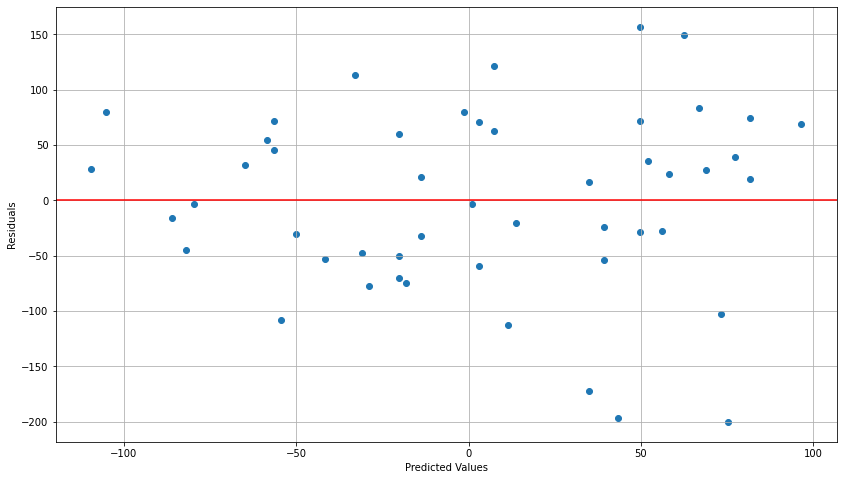

In [11]:
model = sm.OLS(Y_heteroscedastic_diff, sm.add_constant(X[1:])).fit()
B0, B1 = model.params
residuals = model.resid

plt.figure(figsize=(14,8))
plt.scatter(model.predict(), residuals);
plt.axhline(0, color='red')
plt.xlabel('Predicted Values');
plt.ylabel('Residuals');
plt.grid()

In [12]:
breusch_pagan_p = smd.het_breuschpagan(residuals, model.model.exog)[1]
print(breusch_pagan_p)
if breusch_pagan_p > 0.05:
    print("A relação não é heterocedastica.")
if breusch_pagan_p < 0.05:
    print("A relaçao é heterocedastica.")

0.05130807778419853
A relação não é heterocedastica.


Observe que esta nova regressão foi realizada sobre as diferenças entre os dados e, portanto, o resultado da regressão deve ser transformado novamente para retornar a predição para o espaço original. Uma vez que regredimos as diferenças, podemos adicionar nossa diferença prevista nos dados originais para obter nossa estimativa: *

$$ \hat {Y_i} = Y_{i-1} + \hat {Y}_{diff} $$

#### Transformação logarítmica

Em seguida, aplicamos uma transformação logarítmica aos dados subjacentes. Uma transformação logarítmica irá aproximar os resíduos e, idealmente, remover a heteroscedasticidade. Em muitos casos (embora não todos), uma transformação logarítmica é suficiente para estabilizar a variância de uma relacão.

In [13]:
# Taking the log of the previous data Y_heteroscedastic and saving it in Y_heteroscedastic_log
Y_heteroscedastic_log = np.log(Y_heteroscedastic)

Agora que armazenamos a versão transformada em log de `Y_heteroscedastic` em `Y_heteroscedastic_log`, repitimos a regressão e o gráfico residual para ver se a heteroscedasticidade ainda está presente:

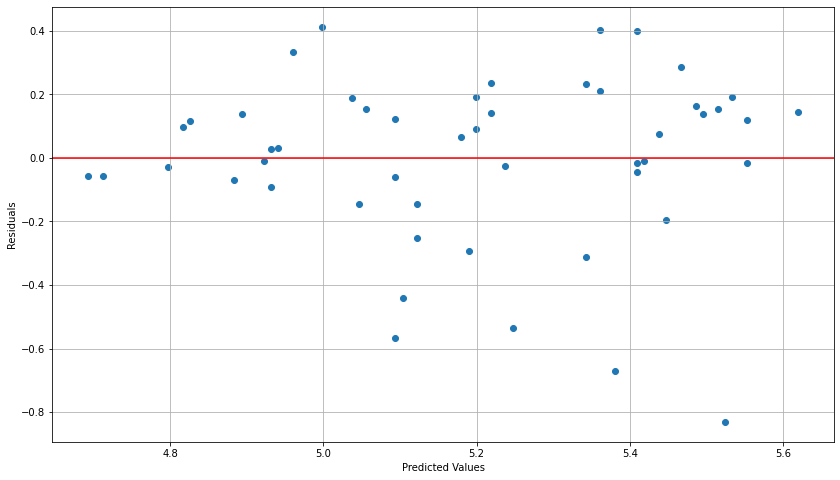

In [14]:
model = sm.OLS(Y_heteroscedastic_log, sm.add_constant(X)).fit()
B0, B1 = model.params
residuals = model.resid

plt.figure(figsize=(14,8))
plt.scatter(model.predict(), residuals);
plt.axhline(0, color='red')
plt.xlabel('Predicted Values');
plt.ylabel('Residuals');
plt.grid()

In [15]:
breusch_pagan_p = smd.het_breuschpagan(residuals, model.model.exog)[1]
print(breusch_pagan_p)
if breusch_pagan_p > 0.05:
    print("A relação não é heterocedastica.")
if breusch_pagan_p < 0.05:
    print("A relaçao é heterocedastica.")

0.12209190323646299
A relação não é heterocedastica.


Observe que esta nova regressão foi realizada no logarítmo dos dados originais. Isso significa que a escala foi alterada e as estimativas de regressão se situarão nessa escala transformada. Para voltar as estimativas para a escala original, você deve transformar de volta os valores usando o inverso do log: *

$$ \hat {Y} = e ^ {\log (\hat {Y})} $$

#### Transformação Box-Cox

Finalmente, examinamos a transformação de Box-Cox. A transformação Box-Cox é um método poderoso que funcionará em vários tipos de relações heterocedasticas. O processo funciona testando todos os valores de $ \lambda $ dentro do intervalo $ [- 5, 5] $ para encontrar o valor que torna a saída da seguinte equação mais próxima para ser normalmente distribuída:
$$
Y ^ {(\lambda)} = \begin {cases}
     \frac {Y ^ {\lambda} -1} {\lambda} &: \lambda \neq 0 \\ \log {Y} &: \lambda = 0
\end {cases}
$$

O "melhor" $ \lambda $ será usado para transformar a série ao longo da função acima. Em vez de ter que fazer tudo isso manualmente, podemos simplesmente usar a função `scipy` `boxcox`. Utilizaremos estafunção para ajustar $ Y $ e remover a heteroscedasticidade.

* Nota: A transformação Box-Cox só pode ser usada se todos os dados forem positivos *

In [16]:
# Finding a power transformation adjusted Y_heteroscedastic
Y_heteroscedastic_box_cox = stats.boxcox(Y_heteroscedastic)[0]

Agora que armazenamos a versão transformada em log de `Y_heteroscedastic` em `Y_heteroscedastic_box_cox`, repitimos a regressão e o gráfico residual para ver se a heteroscedasticidade ainda está presente:

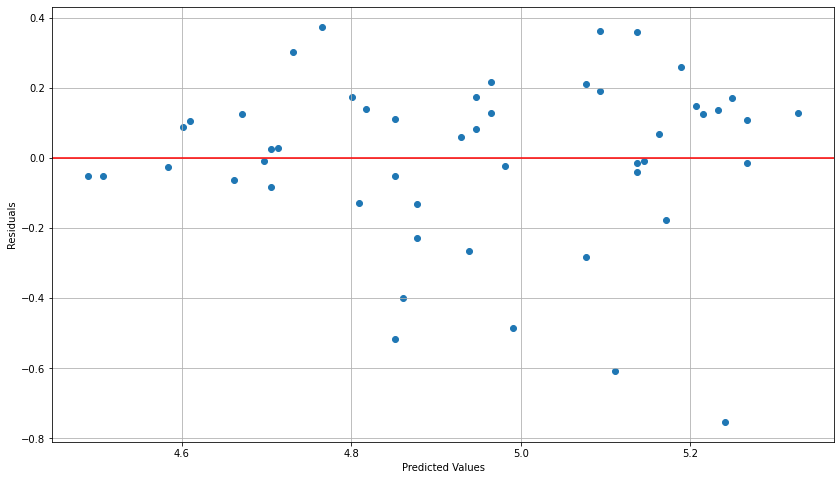

In [17]:
model = sm.OLS(Y_heteroscedastic_box_cox, sm.add_constant(X)).fit()
B0, B1 = model.params
residuals = model.resid
plt.figure(figsize=(14,8))
plt.scatter(model.predict(), residuals);
plt.axhline(0, color='red')
plt.xlabel('Predicted Values');
plt.ylabel('Residuals');
plt.grid()

In [18]:
breusch_pagan_p = smd.het_breuschpagan(residuals, model.model.exog)[1]
print(breusch_pagan_p)
if breusch_pagan_p > 0.05:
    print("A relação não é heterocedastica.")
if breusch_pagan_p < 0.05:
    print("A relaçao é heterocedastica.")

0.12542852140797525
A relação não é heterocedastica.


Agora que a relação não é heteroscedástica, uma regressão linear é apropriada. No entanto, como os dados foram transformados, as estimativas de regressão estarão em uma escala diferente dos dados originais. Por isso, é importante lembrar de retornar os resultados a seu espaço original usando o inverso da função Box-Cox: *

$$ \hat {Y} = (Y ^ {(\lambda)} \lambda + 1) ^ {1 / \lambda} $$

### GARCH Modeling

Outra abordagem para lidar com a heteroscadasticidade é através de um modelo GARCH (Modelo autorregressivo generalizado condicional a heterocedasticidade).

## Residuais e Autocorrelação

Outro pressuposto por trás de regressões lineares é que os resíduos não são auto-correlacionados. Uma série é auto-correlacionada quando esta está correlacionada com uma versão atrasada de si mesma. Um exemplo de uma série potencialmente auto-correlacionada é a maxima das temperaturas diárias. A temperatura de hoje nos dá informações sobre a temperatura de amanhã com confiança razoável (as amostras de temperaturas tendem a serem proximas umas das outras, sem descontinuidades abruptas). Uma série de rolagem de dados justos, no entanto, não seria autocorrelacionada, pois uma amostra não lhe dá informações sobre o próxima. Cada amostra é independente da anterior.

Nós representamos uma dependência de tempo em valores anteriores, da forma:

$$ Y_i = Y_{i-1} + \epsilon $$

Se os resíduos de um modelo forem autocorrelacionados, você poderá fazer previsões sobre os resíduos adjacentes. No caso de $ Y $, sabemos que os dados serão autocorrelados porque podemos fazer previsões baseadas em resíduos adjacentes próximos uns dos outros.

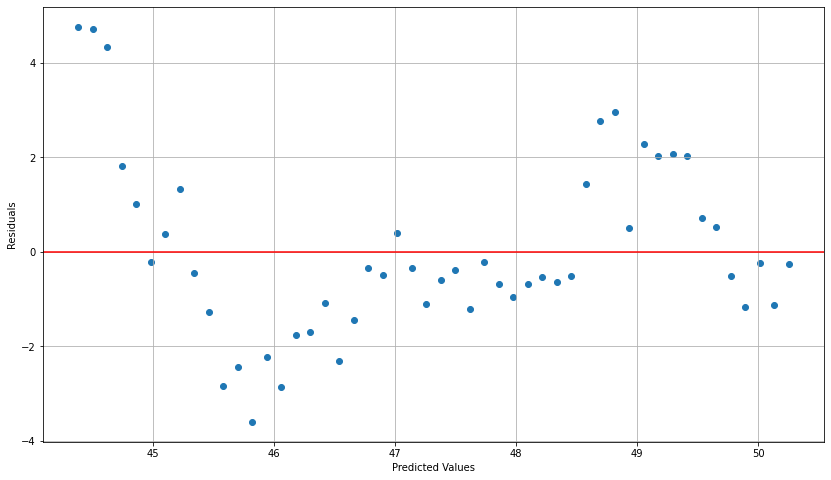

In [19]:
n = 50
X = np.linspace(0, n, n)
Y_autocorrelated = np.zeros(n)
Y_autocorrelated[0] = 50
for t in range(1, n):
    Y_autocorrelated[t] = Y_autocorrelated[t-1] + np.random.normal(0, 1) 

# Regressing X and Y_autocorrelated
model = sm.OLS(Y_autocorrelated, sm.add_constant(X)).fit()
B0, B1 = model.params
residuals = model.resid

plt.figure(figsize=(14,8))
plt.scatter(model.predict(), residuals);
plt.axhline(0, color='red')
plt.xlabel('Predicted Values');
plt.ylabel('Residuals');
plt.grid()

### Métodos estatísticos para detecção de autocorrelação

Tal como acontece com todas as propriedades estatísticas, exigimos um teste estatístico para finalmente decidir se há autocorrelação nos nossos resíduos ou não. Para este fim, usamos um teste Ljung-Box.

Um teste de Ljung-Box é usado para detectar autocorrelação em uma série temporal. Este teste examina a autocorrelação em todos os intervalos de atraso abaixo de um máximo especificado e retorna sequencias contendo as saídas para cada intervalo de atraso testado.

Vamos usar a função `acorr_ljungbox` do modulo `statsmodels` para testar a autocorrelação nos resíduos do nosso modelo. Usamos um intervalo de atraso máximo de $ 10 $ e veremos se algum dos atrasos possui autocorrelação significativa:

In [20]:
ljung_box = smd.acorr_ljungbox(residuals, lags = 10)
print("Multiplicadores de Lagrange:", ljung_box[0])
print("\nValores P:", ljung_box[1], "\n")

if any(ljung_box[1] < 0.05):
    print("Os residuais são autocorrelacionados.")
else:
    print("Os residuais não são autocorrelacionados.")

Multiplicadores de Lagrange: [33.09181632 53.34309187 62.60421006 67.76585783 70.45038443 71.58756197
 71.60482023 72.76170299 76.36015435 82.68273519]

Valores P: [8.79079428e-09 2.61032616e-12 1.63188082e-13 6.72115457e-14
 8.25840622e-14 1.93106973e-13 6.99731544e-13 1.38274238e-12
 8.51050536e-13 1.49285742e-13] 

Os residuais são autocorrelacionados.


/home/tau/Projects/ds_intro/venv/lib/python3.8/site-packages/statsmodels/stats/diagnostic.py:524: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)


Como o teste de Ljung-Box produziu um valor p abaixo de $0,05$ por pelo menos um intervalo de atraso, podemos concluir que os resíduos de nosso modelo são auto-correlacionados.

## Ajustando para Autocorrelação

Podemos ajustar a autocorrelação em muitas das mesmas maneiras que ajustamos para a heterocedasticidade. Vamos testar se um modelo ajustado nas diferenças de primeiro grau de $ Y $ tem resíduos autocorrelacionados:

In [21]:
# Finding first-order differences in Y_autocorrelated
Y_autocorrelated_diff = np.diff(Y_autocorrelated)

Valores P: [0.27837981 0.44575399 0.50958418 0.67789625 0.74416608 0.78672304
 0.86845969 0.92028872 0.95289122 0.90058472] 

Os residuais não são autocorrelacionados.


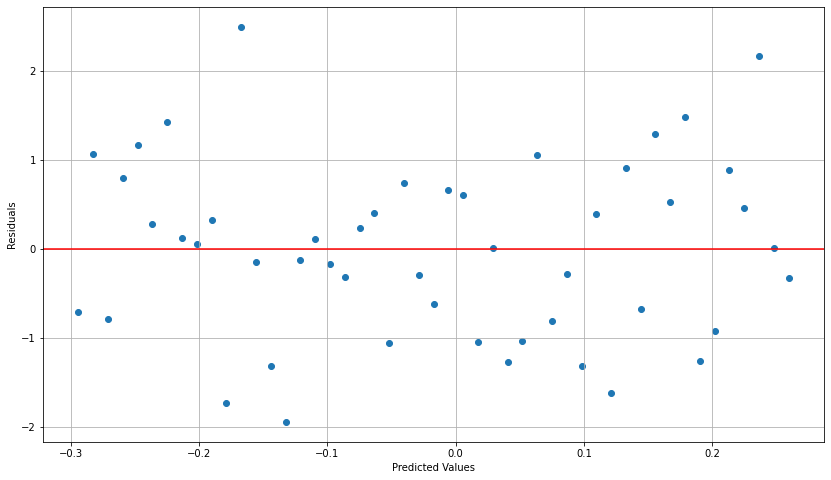

In [22]:
model = sm.OLS(Y_autocorrelated_diff, sm.add_constant(X[1:])).fit()
B0, B1 = model.params
residuals = model.resid

plt.figure(figsize=(14,8))
plt.scatter(model.predict(), residuals);
plt.axhline(0, color='red')
plt.xlabel('Predicted Values');
plt.ylabel('Residuals');
plt.grid()

# Running and interpreting a Ljung-Box test
ljung_box = smd.acorr_ljungbox(residuals, lags = 10)
print("Valores P:", ljung_box[1], "\n")

if any(ljung_box[1] < 0.05):
    print("Os residuais são autocorrelacionados.")
else:
    print("Os residuais não são autocorrelacionados.")

Esta nova regressão foi realizada sobre as diferenças entre os dados e, portanto, o retorno de regressão deve ser transformado novamente para atingir uma predição na escala original. Uma vez que regredimos as diferenças, podemos adicionar nossa diferença prevista nos dados originais para obter nossa estimativa:

$$ \hat {Y_i} = Y_{i-1} + \hat {Y_{dif}} $$

Também podemos realizar uma transformação para escala logarítmica, se assim o desejarmos. Esse processo é idêntico ao que realizamos nos dados heterocedásticos acima, logo, não vamos nos repetir.

[Retornar para o sumário](./index.html)